<a href="https://colab.research.google.com/github/navidyamini/TensorFlow2.0_Codes/blob/main/code/TF2_0_CIFAR_Improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import tensorflow as tf

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import itertools

In [29]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test, = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("X_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

X_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [30]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [31]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3,3), strides=2, activation='relu')(x)

x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
# x = Dropout(0.22) (x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
# x = Dropout(0.2) (x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
# x = Dropout(0.2) (x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [32]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 28s 18ms/step - loss: 1.8815 - accuracy: 0.4224 - val_loss: 1.4287 - val_accuracy: 0.4921
Epoch 2/50
1563/1563 [==============================] - 29s 18ms/step - loss: 1.2531 - accuracy: 0.5567 - val_loss: 1.4885 - val_accuracy: 0.5113
Epoch 3/50
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0860 - accuracy: 0.6220 - val_loss: 1.0764 - val_accuracy: 0.6340
Epoch 4/50
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9657 - accuracy: 0.6661 - val_loss: 1.0615 - val_accuracy: 0.6488
Epoch 5/50
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8697 - accuracy: 0.6977 - val_loss: 1.1868 - val_accuracy: 0.6276
Epoch 6/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7816 - accuracy: 0.7288 - val_loss: 1.2615 - val_accuracy: 0.5977
Epoch 7/50
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7217 - accuracy: 0.7524 - val_loss: 1.0948 -

In [33]:
# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch,epochs=50)

Epoch 1/50


<ipython-input-33-5fedb80a228d>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch,epochs=50)


1562/1562 [==============================] - 36s 23ms/step - loss: 1.1476 - accuracy: 0.6275 - val_loss: 1.2012 - val_accuracy: 0.6977
Epoch 2/50
1562/1562 [==============================] - 36s 23ms/step - loss: 0.9522 - accuracy: 0.6793 - val_loss: 0.8142 - val_accuracy: 0.7404
Epoch 3/50
1562/1562 [==============================] - 37s 24ms/step - loss: 0.9180 - accuracy: 0.6906 - val_loss: 0.8410 - val_accuracy: 0.7256
Epoch 4/50
1562/1562 [==============================] - 35s 22ms/step - loss: 0.8862 - accuracy: 0.7011 - val_loss: 0.7832 - val_accuracy: 0.7452
Epoch 5/50
1562/1562 [==============================] - 36s 23ms/step - loss: 0.8553 - accuracy: 0.7137 - val_loss: 0.8791 - val_accuracy: 0.7400
Epoch 6/50
1562/1562 [==============================] - 35s 23ms/step - loss: 0.8293 - accuracy: 0.7196 - val_loss: 0.8235 - val_accuracy: 0.7581
Epoch 7/50
1562/1562 [==============================] - 36s 23ms/step - loss: 0.8162 - accuracy: 0.7247 - val_loss: 0.7362 - val_accura

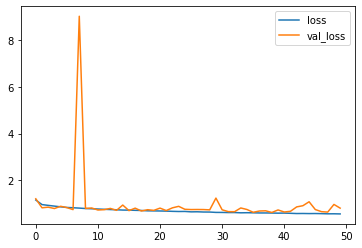

In [34]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

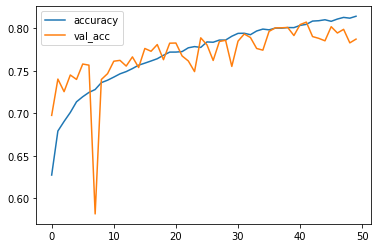

In [35]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 1s 3ms/step
Confusion matrix, without normalization
[[862  18  23  15   9   4   8   8  21  32]
 [  9 920   0   6   1   0   6   2   5  51]
 [ 76   4 640  56  68  20  84  41   0  11]
 [ 16  14  31 625  59  75 106  43   7  24]
 [ 16   4  35  53 703  14  90  77   4   4]
 [ 16  13  17 176  52 602  56  52   1  15]
 [  6   4  18  25  10   4 919   4   3   7]
 [  9   6  14  28  37  16  11 870   0   9]
 [ 64  41   5   9   2   1   4   3 837  34]
 [ 15  65   2   3   1   0   8   4   6 896]]


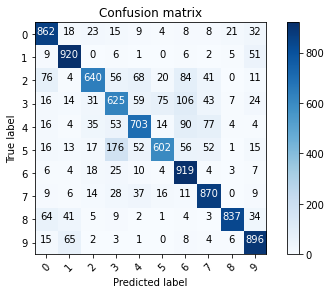

In [36]:
# Plot confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalized=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'
  """
  if normalized:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.ewaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalized else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [37]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

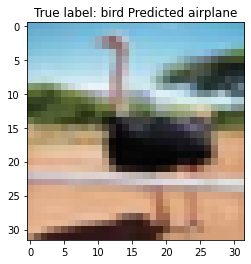

In [38]:
# show some misclassificatied examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted %s" % (labels[y_test[i]], labels[p_test[i]]));

In [39]:
# Now that the model is so large, it's useful to summarize it
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 batch_normalization_11 (Bat  (None, 32, 32, 128)      512       
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 128)      512       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 128)      0   